









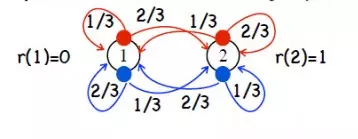


# 动态规划中 策略迭代 和 值迭代 的一个小例子

强化学习中动态规划是解决已知状态转移概率和奖励值情况下的解决方法，这种情况下我们一般可以采取动态规划中的 策略迭代和值迭代的方式来进行求解，下面给出一个具体的小例子。


动态规划可以看成是构成强化学习问题的一个子问题， 与其说是一个子问题更不如说是一种特殊情况，动态规划中我们是知道 reward 和  state transiton probability , 用强化学习的语言表示就是说在动态规划中我们是已知模型的，就是说 在不同状态 state 时我们选择任意行为 action,  所获得的奖励reward和跳转到的新状态是已知的， 不需要我们抽样来学习。而在强化学习问题中我们往往是不知道 奖励值和跳转到的新状态的。

 
也就是说，这里面我们要说的 策略迭代  和  值迭代  都是在已知模型的情况下，因为这里我们讨论的是动态规划问题，而在强化学习中我们往往不知道模型的情况下我们一般采用  蒙特卡洛  和   时序差分的方法， 其中蒙特卡洛方法需要采样一次完整的决策过程才可以对过程中的决策动作更新Q值，计算量较大，计算不方便，不能单步的改进动作Q值， 因此我们往往采用时序差分的方法，如  Q-learnging 和 Sarsa 方法。这里我们主要讲的是动态规划中的策略迭代和值迭代方法， 也可以看做是强化学习中已知模型的情况下求解最优策略的方法。

 

In [16]:
import random

#状态
states=["1", "2"]

#动作
actions=["a", "b"]

# 奖励的折扣因子
gama=0.9

#状态值
v_value={"1":0,"2":0}


# 动作值 ("1", "a"):0
q_value={}

# 输入当前状态，及行为
# return 跳转概率，下一状态, 奖励
p_state_reward={
    ("1", "a"):((1.0/3, "1", 0),(2.0/3, "2", 1)),
    ("1", "b"):((2.0/3, "1", 0),(1.0/3, "2", 1)),
    ("2", "a"):((1.0/3, "1", 0),(2.0/3, "2", 1)),
    ("2", "b"):((2.0/3, "1", 0),(1.0/3, "2", 1))
}

# q_table 初始值
q_value={
    ("1", "a"):0,
    ("1", "b"):0,
    ("2", "a"):0,
    ("2", "b"):0
}

def q_value_fun():
    for key, value in q_value.items():
        temp=0
        for t in p_state_reward[key[0], key[1]]: #key[0]=state, key[1]=action
            temp+=t[0]*(t[2]+gama*v_value[t[1]])
        q_value[key]=temp


# 值迭代方法
def value_iteration():
    global v_value
    flag=True
    v_value_new={}
    q_value_fun()

    for state in states:
        v_value_new[state]=max(q_value[(state, action)] for action in actions)

        if abs(v_value_new[state]-v_value[state])>0.0001:
            flag=False

    if flag==False: 
        v_value=v_value_new
    return flag


def valueEval():
    i=1
    flag=value_iteration()
    while flag!=True:
        i+=1
        flag=value_iteration()

 
    #策略 pi 
    pi={}
    for state in states:
        act=max((q_value[(state, action)],action) for action in actions)[-1]
        temp={}
        for action in actions:
            if action==act:
                temp[action]=1.0
            else:
                temp[action]=0.0

        pi[state]=temp 


    print("*"*30+"\n")
    print("总共运行次数:"+str(i)+"\n")
    print("状态值为：")
    print(v_value) 
    print("")
    print("行为值为：")
    print(q_value) 
    print("策略为：")
    print(pi)
    
valueEval()

******************************

总共运行次数:85

状态值为：
{'1': 6.665711059201351, '2': 6.665711059201351}

行为值为：
{('1', 'a'): 6.665806619947882, ('1', 'b'): 6.332473286614549, ('2', 'a'): 6.665806619947882, ('2', 'b'): 6.332473286614549}
策略为：
{'1': {'a': 1.0, 'b': 0.0}, '2': {'a': 1.0, 'b': 0.0}}


In [15]:
import random

#动作
actions=["a", "b"]

#状态
states=["1", "2"]



epsilon=0.4
gama=0.5
learning_rate=0.01

#  跳转概率，下一状态, 奖励
p_state_reward={
    ("1", "a"):((1.0/3, "1", 0),(2.0/3, "2", 1)),
    ("1", "b"):((2.0/3, "1", 0),(1.0/3, "2", 1)),
    ("2", "a"):((1.0/3, "1", 0),(2.0/3, "2", 1)),
    ("2", "b"):((2.0/3, "1", 0),(1.0/3, "2", 1))
}

# q_table 初始值
q_value={
    ("1", "a"):0,
    ("1", "b"):0,
    ("2", "a"):0,
    ("2", "b"):0
}

#构建环境   s, a    r s a
def next_state_reward(state, action):
    alfa=random.random()
    if alfa < p_state_reward[state, action][0][0]:
        return p_state_reward[state, action][0][1], p_state_reward[state, action][0][2]
    else:
        return p_state_reward[state, action][1][1], p_state_reward[state, action][1][2]

    
def action_max(state):
    if q_value[state, actions[0]] >  q_value[state, actions[1]]:
        return actions[0]
    else:
        return actions[1]
    

def action_greedy(state):
    if random.random()<epsilon:
        return random.choice(actions)
    else:
        return action_max(state)


def q_learning():
    state=random.choice(states)
    action=action_greedy(state)

    next_state, reward=next_state_reward(state, action)
    next_action=action_max(next_state)

    q_estimate = reward + gama*q_value[next_state,next_action]   
    td_error=q_estimate - q_value[state,action] 
    q_value[state,action]+=learning_rate*td_error 


def qlearningMain():
    for episode in range(10**4):
        q_learning()

    print("总共运行次数:"+str(episode)+"\n")
    print(q_value)

qlearningMain()

总共运行次数:9999

{('1', 'a'): 1.2862854149101324, ('1', 'b'): 0.9747408294868576, ('2', 'a'): 1.31112490405848, ('2', 'b'): 1.0925384617291003}
